In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Function to load and preprocess data
def load_and_preprocess_data(filepath, test_size=0.2, random_state=42):
    try:
        df = pd.read_csv(filepath)
    except Exception as e:
        print(f"Error reading data file: {e}")
        return None, None, None, None

    y = df['R']
    X = df.drop(['output_val', 'R'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False, random_state=random_state)
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    return X_train, X_test, y_train, y_test

# Load and preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data(filepath='./data/train_data_histogram_longtime_210000_coursegrained.csv')

X_train shape: (1679200, 1)
y_train shape: (1679200,)


In [15]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.005434809316354579
R^2 Score: 0.0013504544085465309


# Density plot of the data with sns-

<Axes: xlabel='U', ylabel='R'>

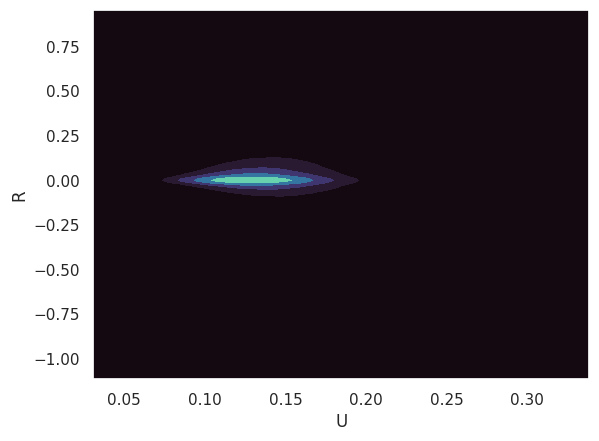

In [19]:
#searborn contour plot
import seaborn as sns
sns.set_theme(color_codes=True)
sns.kdeplot(x=X_test['U'], y=y_test, fill=True, thresh=0, levels=6, cmap="mako")

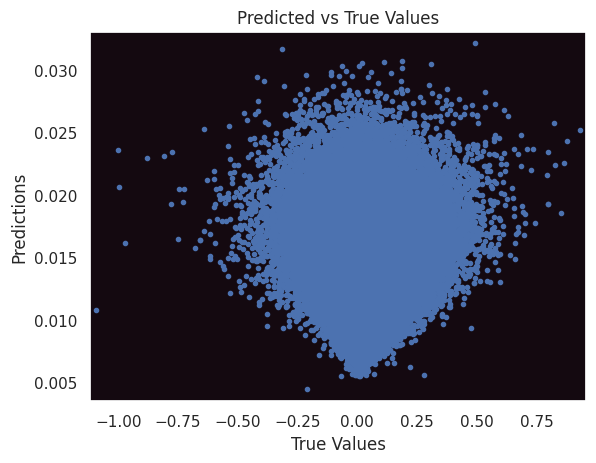

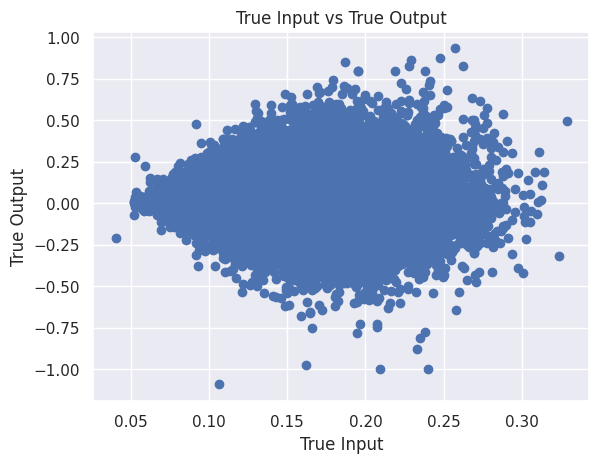

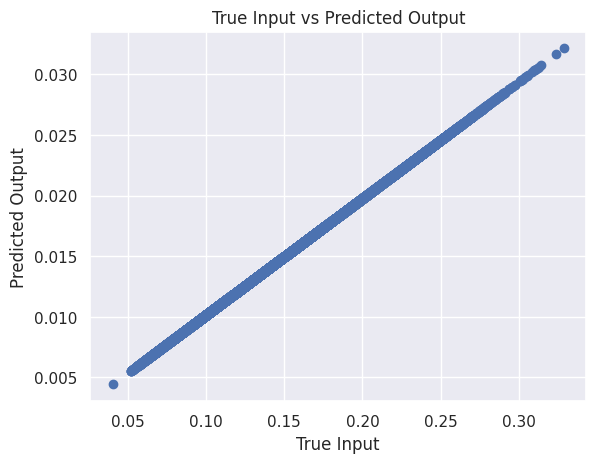

In [6]:
# Plot the predicted vs true results
plt.plot(y_test, y_pred, '.')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted vs True Values")
plt.show()

#plot the true input vs true output
plt.scatter(X_test, y_test)
plt.xlabel("True Input")
plt.show()

#plot the true input vs predicted output
plt.scatter(X_test, y_pred)
plt.xlabel("True Input")
plt.ylabel("Predicted Output")
plt.title("True Input vs Predicted Output")
plt.show()


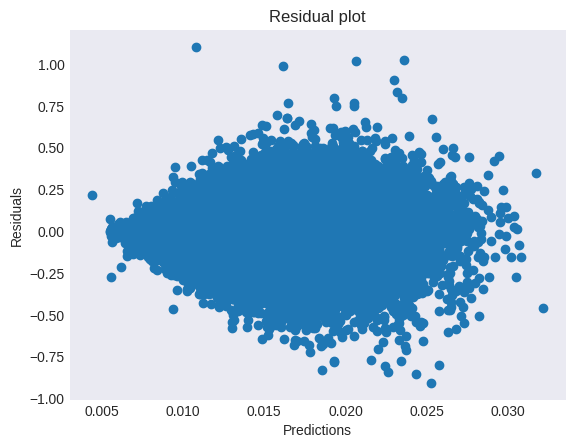

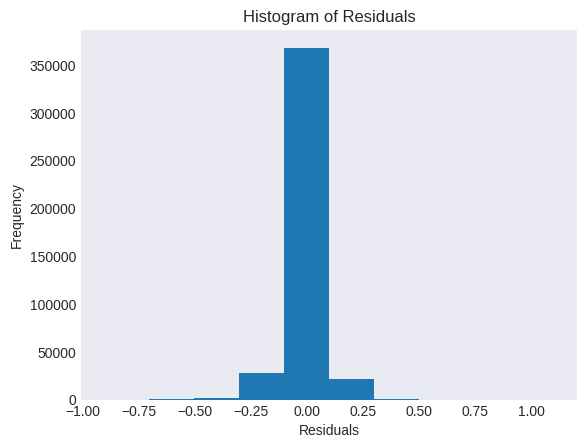

In [63]:
# Plot the residuals
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

# Plot the histogram of the residuals
plt.hist(y_pred - y_test)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

/tmp/ipykernel_1342302/3831771108.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


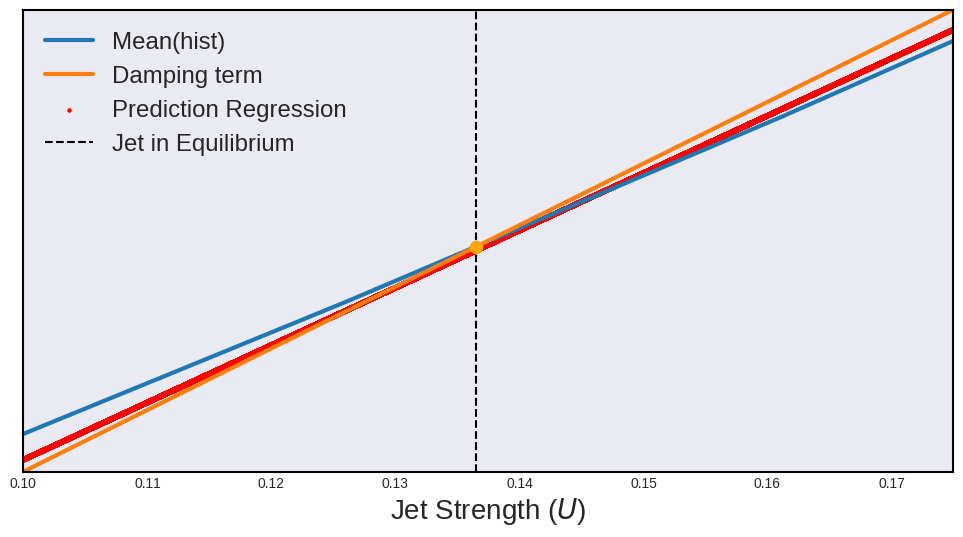

In [56]:
with open("./data/variables_2D_hist.pickle", "rb") as f:
    u_centers, R_mean_in_bins, std_R_given_U, R_sem_in_bins = pickle.load(f)
with open("./data/variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)

plt.style.use('seaborn-dark')

plt.figure(figsize=(12, 6))

plt.plot(u_centers, R_mean_in_bins, label='Mean(hist)', linewidth=3, linestyle='-')
r_m = 0.1
plt.plot(U_space, r_m*U_space, label='Damping term', linewidth=3, linestyle='-')
plt.scatter(X_test, y_pred, label='Prediction Regression', color='red', s=5)

plt.axvline(x=0.1365, color='k', linestyle='--', label='Jet in Equilibrium')

plt.scatter(0.1365, 0.01365, color='orange', zorder=8, s=75)
# plt.annotate('Intersection', (0.1365, 0.01365), textcoords="offset points", xytext=(0,10), ha='right')

# Get the current axes
ax = plt.gca()

# Modify spines to add borders
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# You can also change the color and linewidth of the spines
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.ylim(0.01, 0.0175)
plt.xlim(0.100,0.175)

plt.xlabel('Jet Strength ($U$)', fontsize=20)
plt.legend(fontsize='xx-large')

# Remove ticks and numerical labels from both axes
# plt.xticks([])
plt.yticks([])

plt.show()